In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from IPython.display import SVG
from sknetwork.clustering import Louvain, get_modularity
from sknetwork.linalg import normalize
from sknetwork.utils import get_membership
from sknetwork.visualization import svg_graph, svg_bigraph
from sklearn.decomposition import PCA
from scipy.sparse import csr_matrix
import numpy as np
from sklearn.manifold import TSNE
import nltk
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from sklearn.metrics import silhouette_samples, silhouette_score
import string
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet
from nltk import pos_tag

In [64]:
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
nltk.download('stopwords')


# Initialize the WordNetLemmatizer
lemmatizer = WordNetLemmatizer()
# Set of English stop words
stop_words = set(stopwords.words('english'))

def get_wordnet_pos(word):
    """Map POS tag to first character lemmatize() accepts"""
    tag = pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)

def preprocess_advanced(text):
    # Tokenize text and convert to lowercase
    tokens = word_tokenize(text.lower())
    
    # Remove punctuation and stopwords
    tokens = [token for token in tokens if token not in string.punctuation and token not in stop_words]
    
    # Lemmatize tokens with POS tagging
    lemmas = [lemmatizer.lemmatize(token, get_wordnet_pos(token)) for token in tokens]
    
    # Rejoin lemmas into a string
    return ' '.join(lemmas)

# Example usage
text_example = "The striped bats were hanging on their feet and ate best fishes."
processed_text = preprocess_advanced(text_example)
print(processed_text)


strip bat hang foot ate best fish


[nltk_data] Downloading package punkt to /home/codespace/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /home/codespace/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [114]:
# Read datasets
test = pd.read_csv("data/test.csv")
# Apply advanced preprocessing
test['processed_text_advanced'] = test['text'].apply(preprocess_advanced)

# Vectorize text using TF-IDF
tfidf_vectorizer = TfidfVectorizer(stop_words='english', max_df=0.5, min_df=0.01)
tfidf_matrix = tfidf_vectorizer.fit_transform(test['processed_text_advanced'])

Louvain

In [115]:
# # Use TF-IDF to vectorize texts
# tfidf_vectorizer = TfidfVectorizer(max_features=1000)
# tfidf_matrix = tfidf_vectorizer.fit_transform(test['text'])

# # Calculate cosine similarity matrix
# similarity_matrix = cosine_similarity(tfidf_matrix)

In [116]:
similarity_matrix = cosine_similarity(tfidf_matrix)

similarity_matrix[similarity_matrix < 0.3] = 0

adjacency = csr_matrix(similarity_matrix)

In [117]:
# Loop over a range of resolution parameters to find the one that maximizes the silhouette score
best_resolution = 1.0
best_score = -1
best_labels = None

for resolution in np.linspace(0.5, 2, 10):

    louvain = Louvain(resolution=resolution)
    labels = louvain.fit_predict(adjacency)
    score = silhouette_score(tfidf_matrix, labels)
    
    if score > best_score:
        best_score = score
        best_resolution = resolution
        best_labels = labels

print("Best resolution parameter:", best_resolution)
print("Best silhouette score:", best_score)


Best resolution parameter: 2.0
Best silhouette score: -0.04492442205338607


In [118]:
similarity_matrix = cosine_similarity(tfidf_matrix)

similarity_matrix[similarity_matrix < 0.3] = 0

adjacency = csr_matrix(similarity_matrix)
# Apply the Louvain method
louvain = Louvain(resolution=2)
labels = louvain.fit_predict(adjacency)

In [119]:
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[  0   1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17
  18  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35
  36  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53
  54  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71
  72  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89
  90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125
 126 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143
 144 145 146 147 148 149] [254 245 242 242 240 234 219 189 163 149 142 139 135 109  86  82  52  26
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1   1
   1   1   1   1   1   1 

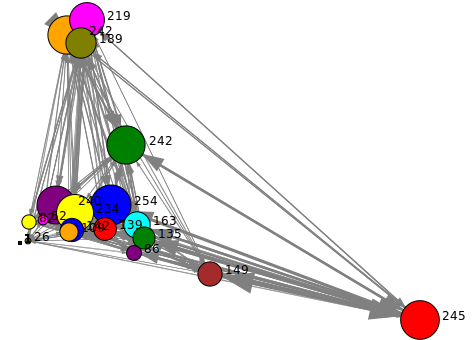

In [120]:
from sklearn.decomposition import TruncatedSVD

svd = TruncatedSVD(n_components=2)
position = svd.fit_transform(tfidf_matrix)

adjacency_aggregate = louvain.aggregate_
average = normalize(get_membership(labels).T)

position_aggregate = average.dot(position)
labels_unique, counts = np.unique(labels, return_counts=True)
image = svg_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
                    display_node_weight=True, node_weights=counts)
SVG(image)

In [121]:
import numpy as np
from scipy.sparse import csr_matrix

def merge_singletons(labels, adjacency_matrix):
    unique, counts = np.unique(labels, return_counts=True)
    singletons = unique[counts == 1]
    
    # Convert labels array to a list for easier manipulation
    labels_list = labels.tolist()
    
    for singleton in singletons:
        singleton_indices = np.where(labels == singleton)[0]  # Find all indices of this singleton
        
        # In this context, we expect each singleton to have exactly one occurrence, hence [0]
        singleton_index = singleton_indices[0]  
        
        # Ensure we're working within the bounds of the matrix
        if singleton_index >= adjacency_matrix.shape[0]:
            continue
        
        # Calculate the connection weights
        column_sum = adjacency_matrix[:, singleton_index].toarray().sum(axis=0)
        row_sum = adjacency_matrix[singleton_index, :].toarray().sum(axis=1)
        total_connection_weight = column_sum + row_sum
        
        # Prepare total_connection_weight for comparison by making it a 1D array
        total_connection_weight = total_connection_weight.flatten()
        
        # Ignore the singleton itself by setting its value to -np.inf
        if singleton_index < len(total_connection_weight):
            total_connection_weight[singleton_index] = -np.inf
        
        # Find the index with the highest connection weight that is not a singleton
        target_index = np.argmax(total_connection_weight)
        
        # Ensure target_index is valid
        if target_index >= len(labels_list):
            continue
        
        # Merge the singleton into the target community
        labels_list[singleton_index] = labels_list[target_index]
    
    # Convert the labels list back to an array
    return np.array(labels_list)

# Example usage (make sure to replace 'labels' and 'adjacency' with your actual data)
labels = merge_singletons(labels, adjacency)


In [122]:
# Analyze clusters
labels_unique, counts = np.unique(labels, return_counts=True)
print(labels_unique, counts)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17] [254 377 242 242 240 234 219 189 163 149 142 139 135 109  86  82  52  26]


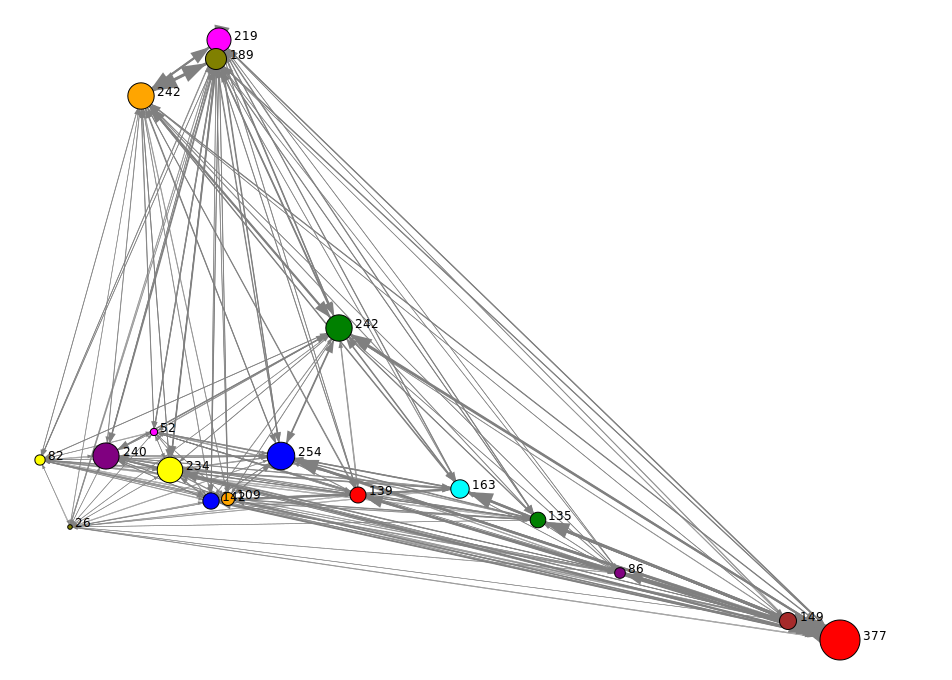

In [126]:
svd = TruncatedSVD(n_components=2)
position = svd.fit_transform(tfidf_matrix)


from scipy.sparse import csr_matrix, coo_matrix
import numpy as np
from sklearn.preprocessing import normalize

def update_adjacency_aggregate(adjacency_matrix, labels):
    # Ensure the adjacency_matrix is in COO format to access .row and .col
    if not isinstance(adjacency_matrix, coo_matrix):
        adjacency_matrix = adjacency_matrix.tocoo()
    
    n_communities = len(np.unique(labels))
    
    # Convert labels to community indices
    community_indices = np.searchsorted(np.unique(labels), labels)
    
    # Access .row and .col attributes after converting to COO format
    rows = community_indices[adjacency_matrix.row]
    cols = community_indices[adjacency_matrix.col]
    data = adjacency_matrix.data
    
    # Sum duplicate entries (i.e., edges between the same communities)
    adjacency_aggregate = coo_matrix((data, (rows, cols)), shape=(n_communities, n_communities)).tocsr()
    adjacency_aggregate.sum_duplicates()
    
    return adjacency_aggregate


def get_membership_matrix(labels):
    n_nodes = len(labels)
    n_communities = len(np.unique(labels))
    rows = np.arange(n_nodes)
    cols = np.searchsorted(np.unique(labels), labels)
    data = np.ones(n_nodes)
    membership_matrix = csr_matrix((data, (rows, cols)), shape=(n_nodes, n_communities))
    return membership_matrix

def update_aggregate_position(position, labels):
    membership_matrix = get_membership_matrix(labels)
    normalized_membership_matrix = normalize(membership_matrix, norm='l1', axis=0)
    position_aggregate = normalized_membership_matrix.T.dot(position)
    return position_aggregate

adjacency_aggregate = update_adjacency_aggregate(adjacency, labels)

position_aggregate = update_aggregate_position(position, labels)

labels_unique, counts = np.unique(labels, return_counts=True)

image = svg_graph(adjacency_aggregate, position_aggregate, counts, labels=labels_unique,
                  display_node_weight=True, node_weights=counts, scale = 2)
SVG(image)

In [127]:
# Calculate modularity
get_modularity(adjacency, labels)

0.45807931706363325

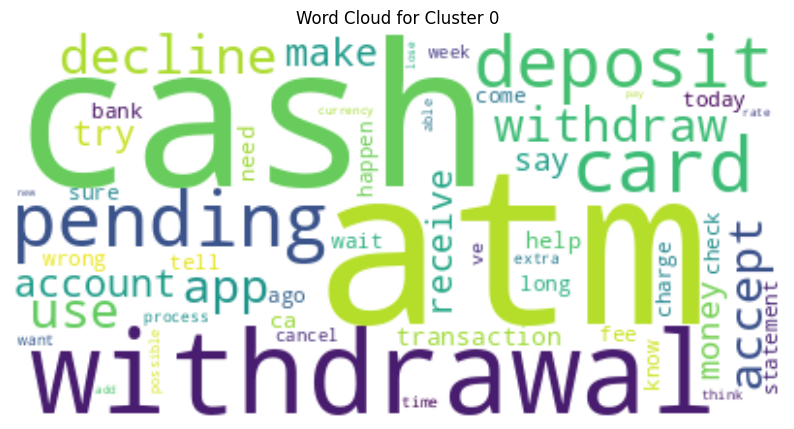

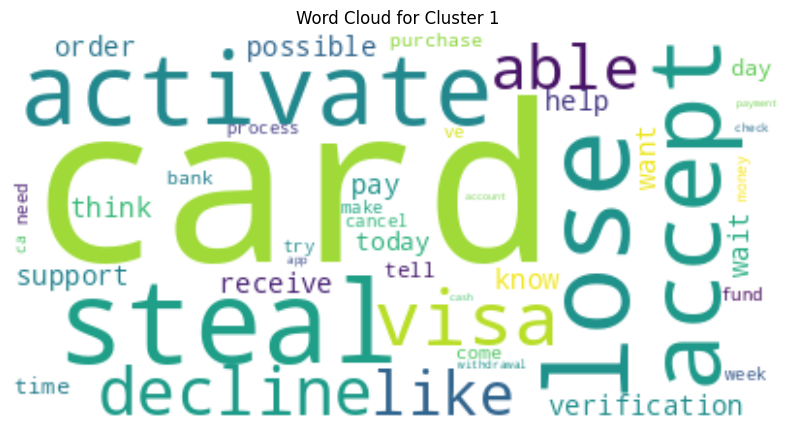

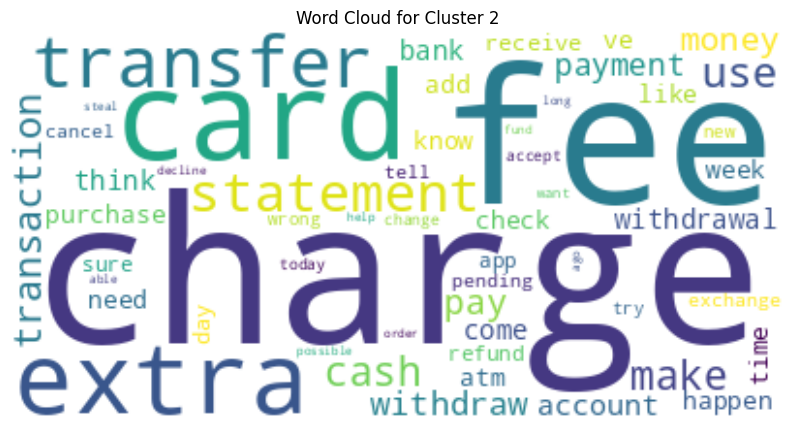

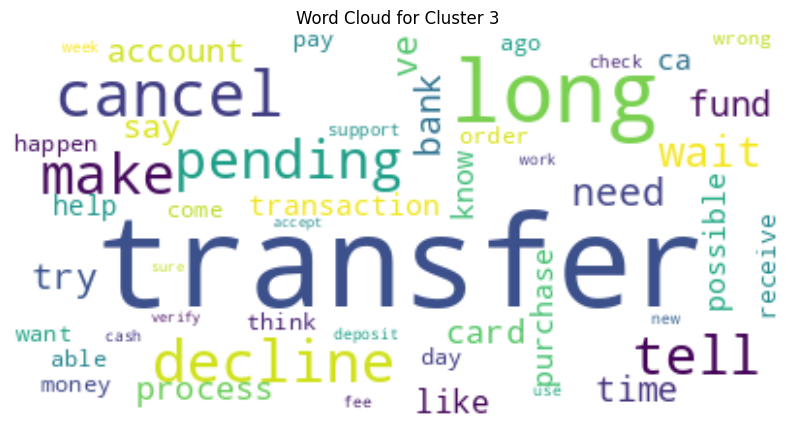

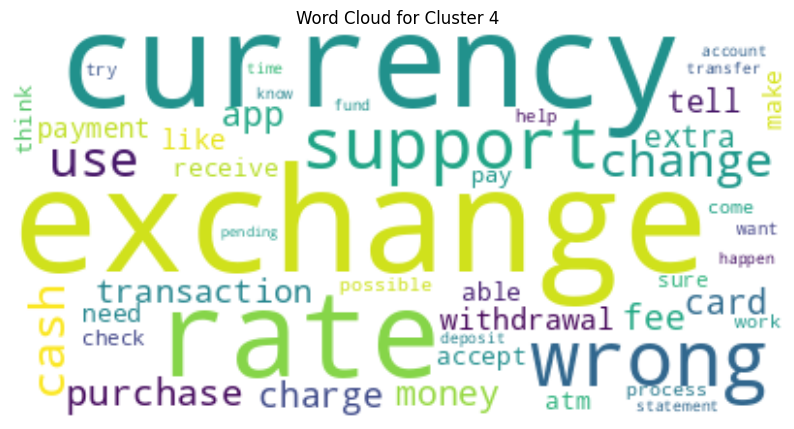

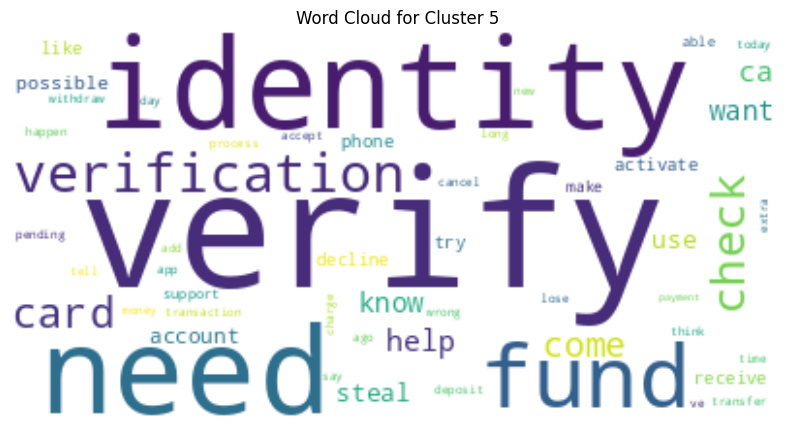

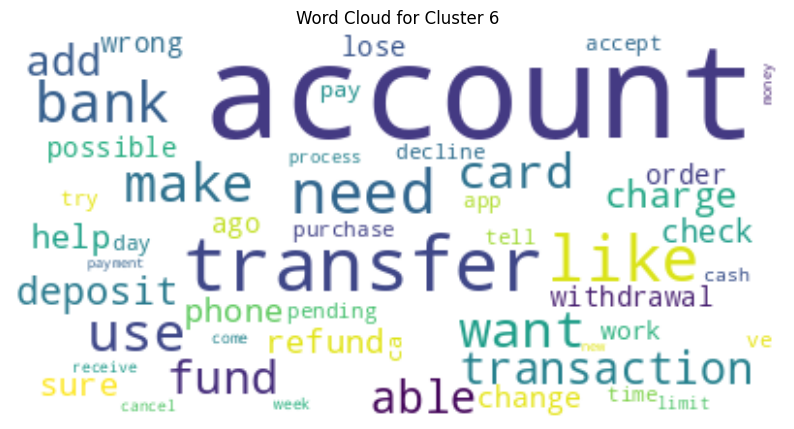

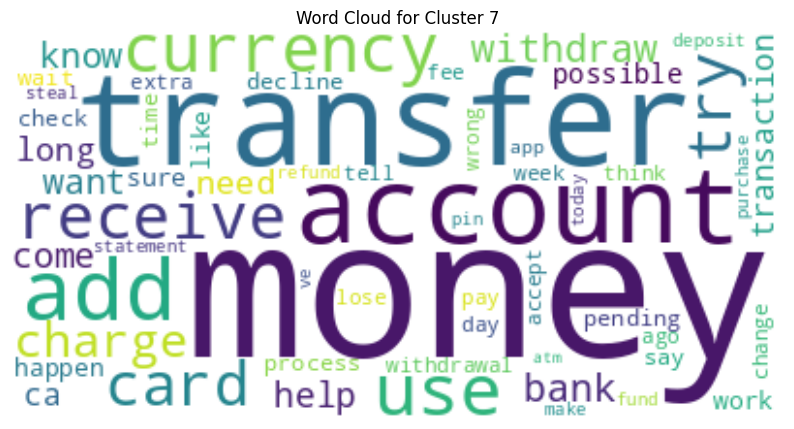

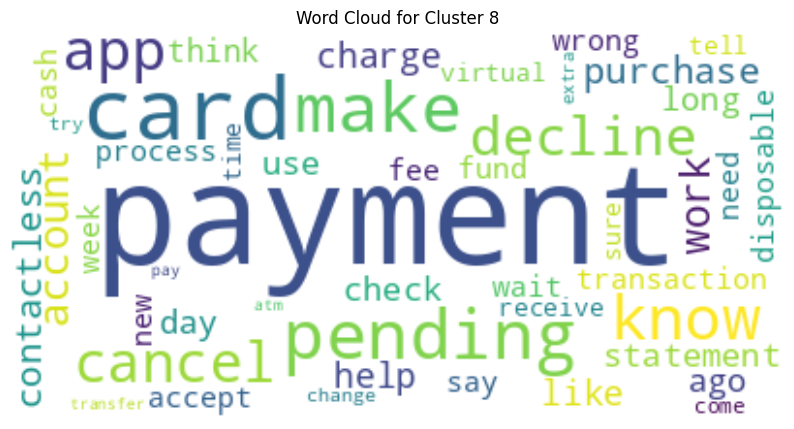

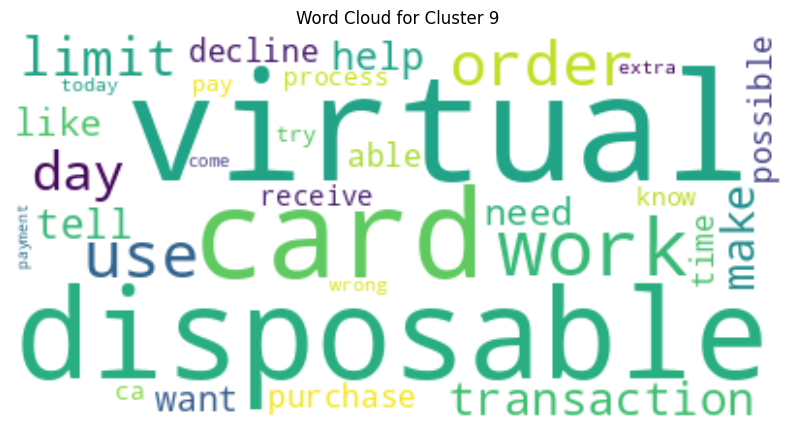

In [128]:
from wordcloud import WordCloud

# Function to generate word clouds for clusters
def generate_word_clouds(tfidf_vectorizer, labels, n_clusters, max_clusters=None):
    features = tfidf_vectorizer.get_feature_names_out()
    for i in range(min(n_clusters, max_clusters)):
        plt.figure(figsize=(10, 8))
        wc = WordCloud(background_color="white", max_words=100)
        cluster_mask = labels == i
        tfidf_matrix_cluster = tfidf_matrix[cluster_mask]
        sum_words = tfidf_matrix_cluster.sum(axis=0)
        words_freq = [(word, sum_words[0, idx]) if not np.isnan(sum_words[0, idx]) else (word, 0) for word, idx in tfidf_vectorizer.vocabulary_.items()]
        words_freq = sorted(words_freq, key=lambda x: x[1], reverse=True)
        words_freq = {word: freq for word, freq in words_freq if freq > 0}  # Filter out words with 0 frequency
        wc.generate_from_frequencies(words_freq)
        plt.imshow(wc, interpolation='bilinear')
        plt.axis("off")
        plt.title(f'Word Cloud for Cluster {i}')
        plt.show()

n_clusters = len(np.unique(labels))

generate_word_clouds(tfidf_vectorizer, labels, n_clusters, max_clusters=10)



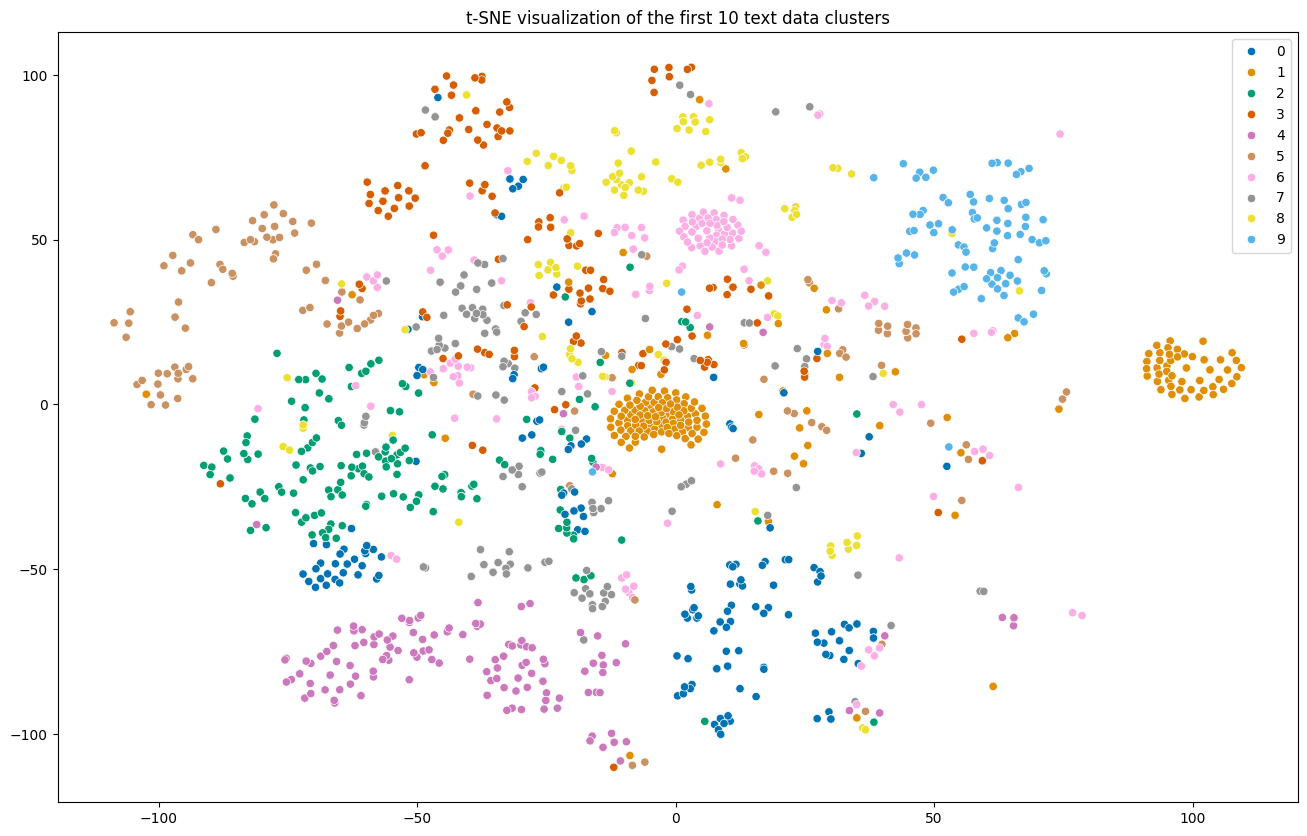

In [135]:
import seaborn as sns

from sklearn.manifold import TSNE

x = 10

tsne = TSNE(n_components=2, perplexity=30, n_iter=1000, random_state=42)
tsne_results = tsne.fit_transform(tfidf_matrix.toarray())

indices_to_keep = np.isin(labels, range(x))
filtered_tsne_results = tsne_results[indices_to_keep]
filtered_labels = labels[indices_to_keep]

n_clusters = len(np.unique(filtered_labels))

plt.figure(figsize=(16, 10))
sns.scatterplot(x=filtered_tsne_results[:,0], y=filtered_tsne_results[:,1], hue=filtered_labels, 
                palette=sns.color_palette("colorblind", n_clusters), legend="full")
plt.title('t-SNE visualization of the first ' + str(x) + ' text data clusters')
plt.show()


The average silhouette_score is : 0.12562139075826442


/tmp/ipykernel_76878/3147083748.py:8: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(sample_silhouette_values, bins=20, kde=True)


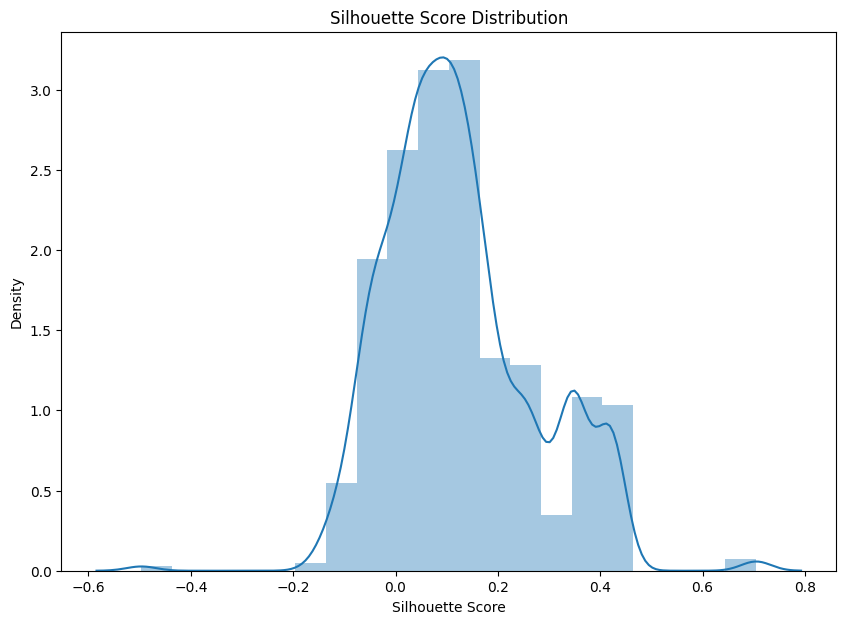

In [131]:
silhouette_avg = silhouette_score(tfidf_matrix, labels)
print("The average silhouette_score is :", silhouette_avg)

# Compute the silhouette scores for each sample
sample_silhouette_values = silhouette_samples(tfidf_matrix.toarray(), labels)

plt.figure(figsize=(10, 7))
sns.distplot(sample_silhouette_values, bins=20, kde=True)
plt.title('Silhouette Score Distribution')
plt.xlabel('Silhouette Score')
plt.ylabel('Density')
plt.show()
